## Final Project Submission

Please fill out:
* Student name: Amanda Gaeta
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Lindsey Berlin
* Blog post URL:


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring Largest Dataset from IMDB

The IMDB Basics is the largest data set. It also has a tconst that is a unique ID to the movie, which tells me it will be additionally helpful for merges/joins. 

Below I explore what is in this file as well as drill in to the years of the movies represented and the top genres.

In [6]:
# Import IMDB Title Basics
imdb_tb_df = pd.read_csv('rawData/zippedData/imdb.title.basics.csv.gz')
# Preview file
imdb_tb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
# Get overview of data types and any existing nulls
imdb_tb_df.info()
# runtime_minutes has many nulls in comparison to full set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# What years of movies are in this table?
imdb_tb_df['start_year'].describe()
# Max is outlier

count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [9]:
# Sort table descending by start_year to see if additional outliers, and preview
imdb_tb_df.sort_values(by='start_year', ascending=False, inplace=True)
imdb_tb_df.head()
# Looks like this table has upcoming movies that may be in production and/or dirty data with future start_year

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"


In [11]:
# Be conservative and filter down table to min 2010 and max 2019 as main analysis dataset
twenty_tens_imdb_tb = imdb_tb_df[(imdb_tb_df['start_year'] >= 2010) & (imdb_tb_df['start_year'] <= 2019)]

In [14]:
# Preview new table/ check work
twenty_tens_imdb_tb.head() # top rows are 2019
twenty_tens_imdb_tb.tail() # bottom rows ae 2010

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
74712,tt4264626,Civil War Life: Shot to Pieces,Civil War Life: Shot to Pieces,2010,79.0,Documentary
14471,tt1716746,Heinrich Kieber - Datendieb,Heinrich Kieber - Datendieb,2010,52.0,Documentary
74692,tt4263706,Mushrooms of America,Mushrooms of America,2010,46.0,"Adventure,Comedy,Documentary"
118065,tt7059624,Zamana,Zamana,2010,140.0,Drama
94000,tt5475580,A Boy and A Girl,A Boy and A Girl,2010,NaN,Romance


In [17]:
# What is the movie landscape of the 2010s - Answer what genres of movies were made most in 2010s
# Look at genre data for quality
twenty_tens_imdb_tb['genres'].isna().sum() # 5359 nulls

5359

In [25]:
# Small % of full table, could drop, but will fill with Unknown for now
twenty_tens_imdb_tb['genres'] = twenty_tens_imdb_tb['genres'].fillna('Unknown')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# Check work
twenty_tens_imdb_tb['genres'].isna().sum()
# No nulls left

0

In [27]:
# How many unique values in genres column
len(twenty_tens_imdb_tb['genres'].unique())

1085

In [43]:
# Many unique values, filte down to look at top 10 genres
top_ten_genres_imdb = twenty_tens_imdb_tb['genres'].groupby(twenty_tens_imdb_tb['genres']).count().sort_values(ascending=False).head(10)

In [40]:
# Starting to plot import seaborn
import seaborn as sns
sns.set(style="darkgrid")

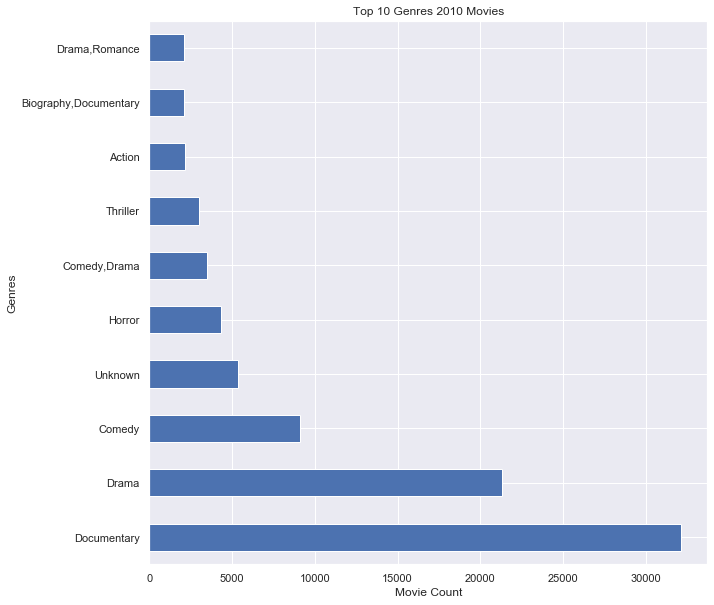

In [41]:
# Create bar chart 
top_ten_genres_imdb.plot(kind='barh', figsize=(10,10))
plt.title('Top 10 Genres 2010 Movies')
plt.xlabel('Movie Count')
plt.ylabel('Genres')
plt.show()

In [49]:
# Unknown is in Top 10, drop the small % of Unknowns fo analysis
twenty_tens_imdb_tb = twenty_tens_imdb_tb[twenty_tens_imdb_tb['genres'] != 'Unknown']

In [50]:
# Relook at top 10 genres
top_ten_genres_imdb = twenty_tens_imdb_tb['genres'].groupby(twenty_tens_imdb_tb['genres']).count().sort_values(ascending=False).head(10)

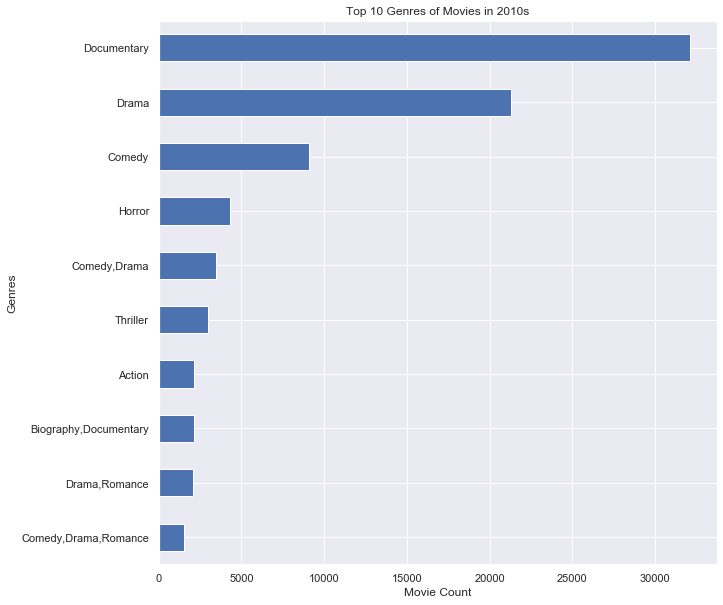

In [53]:
# Use same plot, reverse y axis so most common occurrence on top
top_ten_genres_imdb.plot(kind='barh', figsize=(10,10))
plt.title('Top 10 Genres of Movies in 2010s')
plt.xlabel('Movie Count')
plt.ylabel('Genres')
plt.gca().invert_yaxis()
plt.show()
# Documentaries, Drama, Comedy, Horror, Comedy/Drama, Thriller, Action, Biogaphy, Documentary, Drama/Romance, 
# and Comedy/Drama/Romance made most in 2010s

## Audience Perspective

The above is from IMDB as a reference source of movies, but there is also Rotten Tomatoes data to explore from the audience perspective what people enjoy. 

In [ ]:
# Make pretty version of RT workbook that walks through - avg number of votes, table merging and genre represenation